In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time
%matplotlib inline

## Iterative Methods for Poisson & Laplace Equations
*From U S Vevek*

The following is the Poisson equation:

$$\nabla^2{u}=f$$

The Laplace equation is just the homogeneous Poisson equation:

$$\nabla^2{u}=0$$

In this lecture, we will consider only the two-dimensional Poisson equation. All the methods discussed can be applied to the Laplace equation as well by letting $f(x,y)=0$.

$$\nabla^2{u}=\frac{\partial^2{u}}{\partial{x^2}}+\frac{\partial^2{u}}{\partial{y^2}}=f(x,y)$$


### Problem

We will compare the various iterative methods to solve the Poisson equation using the following example.

$$\frac{\partial^2{u}}{\partial{x^2}}+\frac{\partial^2{u}}{\partial{y^2}}=2\left[x(x-1)+y(y-1)\right]$$

The boundary conditions are set as $u=0$ along all four sides of the $1\times{1}$ sqaure domain. This problem has an analytical solution given by the following expression:

$$u(x,y)=xy(x-1)(y-1)$$


### Discretization

Assuming that $\Delta{x}=\Delta{y}=h$, we can write the discretized Poisson equation in the following manner:

$$u_{i+1,j}+u_{i-1,j}+u_{i,j+1}+u_{i,j-1}-4u_{i,j}=f_{i,j}h^2$$

This expression below is exactly the same as the one above. It has been rearranged in the form of a recurrence relationship:
$$u_{i,j} = u_{i,j} + \frac{\omega}{4}\left(u_{i+1,j}+u_{i-1,j}+u_{i,j+1}+u_{i,j-1}-4u_{i,j}-f_{i,j}h^2\right)$$

$$u_{i,j} = (1-\omega)u_{i,j} + \frac{\omega}{4}\left(u_{i+1,j}+u_{i-1,j}+u_{i,j+1}+u_{i,j-1}-f_{i,j}h^2\right)$$

By choosing the values of the terms at certain iterations, we can form all the iterative schemes that we will discuss later. In all the cases, we will take $u^0=0$ as our initial guess of the solution. (Note: The superscript of $u$ refers to the iteration and not the time-step. This is a time-independent problem!)

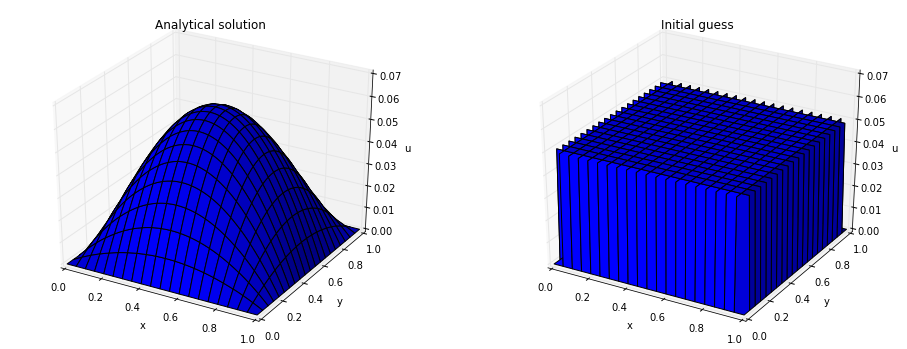

In [102]:
# Domain
L = 1.
n = 101
h = L/(n-1)
x = y = np.linspace(0,L,n)
X,Y = np.meshgrid(x,y)

# Source term
f = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        f[i,j] = 2*x[i]*(x[i]-1)+2*y[j]*(y[j]-1)

# Analytical solution
u_a = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        u_a[i,j] = x[i]*y[j]*(x[i]-1)*(y[j]-1)
        
# Initial guess
u0 = np.ones((n,n))/20
u0[0,:] = u0[-1,:] = u0[:,0] = u0[:,-1] = 0

# Plot analytical solution & initial guess
fig = plt.figure(figsize=(16,6), dpi=50)
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X,Y,u_a,rstride=5,cstride=5), plt.title('Analytical solution')
ax.set_xlabel('x'), ax.set_ylabel('y'), ax.set_zlabel('u'), ax.set_zlim3d(bottom=0,top=0.07)
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X,Y,u0,rstride=5,cstride=5), plt.title('Initial guess')
ax.set_xlabel('x'), ax.set_ylabel('y'), ax.set_zlabel('u'), ax.set_zlim3d(bottom=0,top=0.07)
plt.show()

### Jacobi Iteration Method
  
$\omega=1$

$$u_{i,j}^{m+1} = \frac{1}{4}\left(u_{i+1,j}^{m}+u_{i-1,j}^{m}+u_{i,j+1}^{m}+u_{i,j-1}^{m}-f_{i,j}h^2\right)$$

In [79]:
#Jacobi Iteration Method
def jacobi(u,f,h,max_err,max_it):
    t = time.time()
    
    u_n = u.copy()
    conv = []
    it = 0
    while True:
        it = it+1
        u_n[1:-1,1:-1] = 0.25*(u_n[2:,1:-1] + u_n[:-2,1:-1] + u_n[1:-1,2:] + u_n[1:-1,:-2] - f[1:-1,1:-1]*h*h)
        
        err = error(u_n)
        conv = np.concatenate((conv,[err]))
        
        if err < max_err:
            break
            
        if it > max_it:
            break
    
    t = time.time() - t
    
    print 'Computation time = ' + ('%.5f' %t) + 's'
    print 'Iterations =', it
    print 'Maximum error = ' + ('%.4f' %err)
    #plt3d(u_n, 'Jacobi iteration method')
    plt2d(conv,it,'Jacobi iteration method')
    
    return u_n, it, conv, t

Computation time = 0.26300s
Iterations = 664
Maximum error = 0.0100


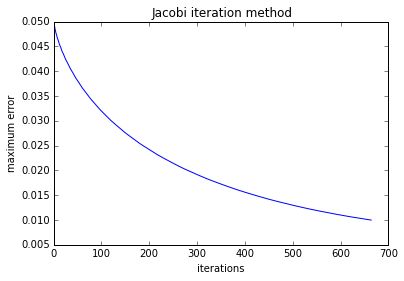

In [80]:
u_j, it_j, conv_j, t_j = jacobi(u0,f,h,0.01,1000)

### Gauss-Seidel Iteration Method
$\omega=1$
 
$$u_{i,j}^{m+1} = \frac{1}{4}\left(u_{i+1,j}^{m}+u_{i-1,j}^{m+1}+u_{i,j+1}^{m}+u_{i,j-1}^{m+1}-f_{i,j}h^2\right)$$

In [81]:
#Gauss-Seidel Iteration Method
def gauss_seidel(u,f,h,max_err,max_it):
    t = time.time()
    
    u_n = u.copy()
    conv = []
    it = 0
    while True:
        it = it+1
        for i in range(1,n-1):
            for j in range(1,n-1):
                u_n[i,j] = 0.25*(u_n[i+1,j] + u_n[i-1,j] + u_n[i,j+1] + u_n[i,j-1] - f[i,j]*h*h)
                
        err = error(u_n)
        conv = np.concatenate((conv,[err]))
        
        if err < max_err:
            break
            
        if it > max_it:
            break
    
    t = time.time() - t
    
    print 'Computation time = ' + ('%.5f' %t) + 's'
    print 'Iterations =', it
    print 'Maximum error = ' + ('%.4f' %err)
    plt2d(conv,it,'Gauss-Seidel iteration method')
    
    return u_n, it, conv, t

Computation time = 13.25100s
Iterations = 356
Maximum error = 0.0100


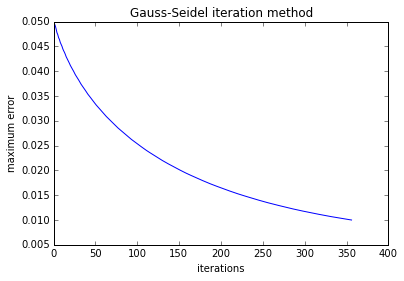

In [82]:
u_gs, it_gs, conv_gs, t_gs = gauss_seidel(u0,f,h,0.01,1000)

### Successive Over-Relaxation [SOR] Iteration Method
$1<\omega<2$
 
$$u_{i,j}^{m+1} = (1-\omega)u_{i,j}^{m} + \frac{\omega}{4}\left(u_{i+1,j}^{m}+u_{i-1,j}^{m+1}+u_{i,j+1}^{m}+u_{i,j-1}^{m+1}-f_{i,j}h^2\right)$$

In [83]:
#SOR Iteration Method
def sor(u,f,h,max_err,max_it,w):
    t = time.time()
    
    u_n = u.copy()
    conv = []
    it = 0
    while True:
        it = it+1
        for i in range(1,n-1):
            for j in range(1,n-1):
                u_n[i,j] = (1-w)*u_n[i,j] + 0.25*w*(u_n[i+1,j] + u_n[i-1,j] + u_n[i,j+1] + u_n[i,j-1] - f[i,j]*h*h)
                
        err = error(u_n)
        conv = np.concatenate((conv,[err]))
        
        if err < max_err:
            break
            
        if it > max_it:
            break
    
    t = time.time() - t
    
    print 'Computation time = ' + ('%.5f' %t) + 's'
    print 'Iterations =', it
    print 'Maximum error = ' + ('%.4f' %err)
    plt2d(conv,it,'Successive over-relaxation (SOR) iteration method ($\omega$ = '+str(w)+')')
    
    return u_n, it, conv, t

Computation time = 2.62900s
Iterations = 51
Maximum error = 0.0099


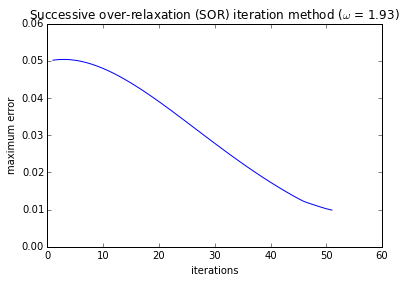

In [84]:
u_sor, it_sor, conv_sor, t_sor = sor(u0,f,h,0.01,1000,1.93)

### Line Gauss-Seidel Iteration Method [Implicit]
$\omega=1$

$$u_{i,j}^{m+1} = \frac{1}{4}\left(u_{i+1,j}^{m+1}+u_{i-1,j}^{m+1}+u_{i,j+1}^{m}+u_{i,j-1}^{m+1}-f_{i,j}h^2\right)$$

* Column-wise

$$u_{i+1,j}^{m+1}-4u_{i,j}^{m+1}+u_{i-1,j}^{m+1}=-u_{i,j+1}^{m}-u_{i,j-1}^{m+1}+f_{i,j}h^2$$

* Row-wise

$$u_{i,j+1}^{m+1}-4u_{i,j}^{m+1}+u_{i,j-1}^{m+1}=-u_{i+1,j}^{m}-u_{i-1,j}^{m+1}+f_{i,j}h^2$$

* **Alternating-direction implicit method**, as the name implies, involves performing the row-wise and column-wise line Gauss-Seidel iteration in an alternating manner.

In [85]:
#Line Gauss-Seidel Iteration Method
def line_gauss_seidel(u,f,h,max_err,max_it,method):
    t = time.time()
    
    u_n = u.copy()
    conv = []
    it = 0
    l, d_n, up = CM(n-2)
    B = np.zeros(n)
    
    if method == 'column':
        title = 'Line Gauss-Seidel iteration method [column]'
        while True:
            it = it+1
            for j in range(1,n-1):
                B[1:-1] = -u_n[2:,j] - u_n[:-2,j] + f[1:-1,j]*h*h
                u_n[1:-1,j] = TDMA(B[1:-1],l,d_n,up)

            err = error(u_n)
            conv = np.concatenate((conv,[err]))

            if err < max_err:
                break

            if it > max_it:
                break
                
    if method == 'row':
        title = 'Line Gauss-Seidel iteration method [row]'
        while True:
            it = it+1
            for i in range(1,n-1):
                B[1:-1] = -u_n[i,2:] - u_n[i,:-2] + f[i,1:-1]*h*h
                u_n[i,1:-1] = TDMA(B[1:-1],l,d_n,up)

            err = error(u_n)
            conv = np.concatenate((conv,[err]))

            if err < max_err:
                break

            if it > max_it:
                break
                
    if method == 'adi':
        title = 'Line Gauss-Seidel iteration method [ADI]'
        while True:
            it = it+1
            for j in range(1,n-1):
                B[1:-1] = -u_n[2:,j] - u_n[:-2,j] + f[1:-1,j]*h*h
                u_n[1:-1,j] = TDMA(B[1:-1],l,d_n,up)

            for i in range(1,n-1):
                B[1:-1] = -u_n[i,2:] - u_n[i,:-2] + f[i,1:-1]*h*h
                u_n[i,1:-1] = TDMA(B[1:-1],l,d_n,up)

            err = error(u_n)
            conv = np.concatenate((conv,[err]))

            if err < max_err:
                break

            if it > max_it:
                break 
    
    t = time.time() - t
    
    print 'Computation time = ' + ('%.5f' %t) + 's'
    print 'Iterations =', it
    print 'Maximum error = ' + ('%.4f' %err)
    plt2d(conv,it,title)
    
    return u_n, it, conv, t

Computation time = 39.23200s
Iterations = 1001
Maximum error = 0.0383


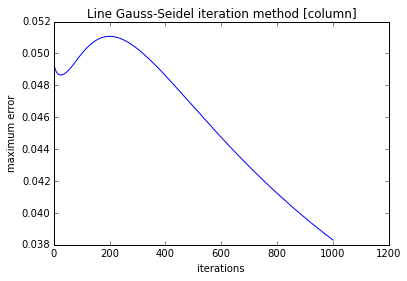

In [86]:
u_lgs, it_lgs, conv_lgs, t_lgs = line_gauss_seidel(u0,f,h,0.01,1000,'column')

Computation time = 11.95300s
Iterations = 166
Maximum error = 0.0100


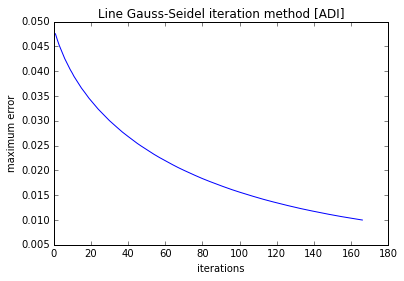

In [87]:
u_adi, it_adi, conv_adi, t_adi = line_gauss_seidel(u0,f,h,0.01,1000,'adi')

### Line Successive Over-Relaxation [LSOR] Iteration Method
$1<\omega<2$

* Row-wise

$$u_{i,j}^{m+1} = (1-\omega)u_{i,j}^{m} + \frac{\omega}{4}\left(u_{i+1,j}^{m+1}+u_{i-1,j}^{m+1}+u_{i,j+1}^{m}+u_{i,j-1}^{m+1}-f_{i,j}h^2\right)$$

$$\omega u_{i+1,j}^{m+1}-4u_{i,j}^{m+1}+\omega u_{i-1,j}^{m+1} = -4(1-\omega)u_{i,j}^{m} - \omega \left(u_{i,j+1}^{m}+u_{i,j-1}^{m+1}-f_{i,j}h^2\right)$$

* Column-wise

$$u_{i,j}^{m+1} = (1-\omega)u_{i,j}^{m} + \frac{\omega}{4}\left(u_{i+1,j}^{m}+u_{i-1,j}^{m+1}+u_{i,j+1}^{m+1}+u_{i,j-1}^{m+1}-f_{i,j}h^2\right)$$

$$\omega u_{i,j+1}^{m+1}-4u_{i,j}^{m+1}+\omega u_{i,j-1}^{m+1} = -4(1-\omega)u_{i,j}^{m} - \omega \left(u_{i+1,j}^{m}+u_{i-1,j}^{m+1}-f_{i,j}h^2\right)$$

In [116]:
#Line SOR Iteration Method
def line_sor(u,f,h,max_err,max_it,w,method):
    t = time.time()
    
    u_n = u.copy()
    conv = []
    it = 0
    l, d_n, up = CMR(n-2,w)
    B = np.zeros(n)
    
    if method == 'column':
        title = 'Line SOR iteration method [column]'
        while True:
            it = it+1
            for j in range(1,n-1):
                B[1:-1] = -4*(1-w)*u_n[1:-1,j]-w*(u_n[2:,j] + u_n[:-2,j] - f[1:-1,j]*h*h)
                u_n[1:-1,j] = TDMA(B[1:-1],l,d_n,up)

            err = error(u_n)
            conv = np.concatenate((conv,[err]))

            if err < max_err:
                break

            if it > max_it:
                break
                
    if method == 'row':
        title = 'Line SOR iteration method [row]'
        while True:
            it = it+1
            for i in range(1,n-1):
                B[1:-1] = -4*(1-w)*u_n[i,1:-1]-w*(u_n[i,2:] + u_n[i,:-2] - f[i,1:-1]*h*h)
                u_n[i,1:-1] = TDMA(B[1:-1],l,d_n,up)

            err = error(u_n)
            conv = np.concatenate((conv,[err]))

            if err < max_err:
                break

            if it > max_it:
                break
                
    if method == 'adi':
        title = 'Line SOR iteration method [ADI]'
        while True:
            it = it+1
            for j in range(1,n-1):
                B[1:-1] = -4*(1-w)*u_n[1:-1,j]-w*(u_n[2:,j] + u_n[:-2,j] - f[1:-1,j]*h*h)
                u_n[1:-1,j] = TDMA(B[1:-1],l,d_n,up)

            for i in range(1,n-1):
                B[1:-1] = -4*(1-w)*u_n[i,1:-1]-w*(u_n[i,2:] + u_n[i,:-2] - f[i,1:-1]*h*h)
                u_n[i,1:-1] = TDMA(B[1:-1],l,d_n,up)

            err = error(u_n)
            conv = np.concatenate((conv,[err]))

            if err < max_err:
                break

            if it > max_it:
                break 
    
    t = time.time() - t
    
    print 'Computation time = ' + ('%.5f' %t) + 's'
    print 'Iterations =', it
    print 'Maximum error = ' + ('%.4f' %err)
    plt2d(conv,it,title + ' ($\omega$ = '+str(w)+')')
    
    return u_n, it, conv, t

Computation time = 39.26300s
Iterations = 1001
Maximum error = 0.0249


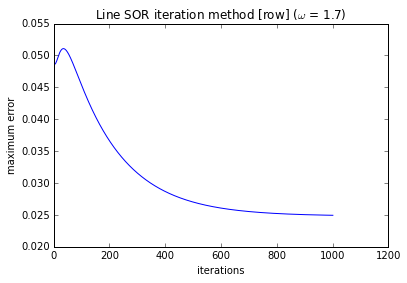

In [93]:
u_lsor, it_lsor, conv_lsor, t_lsor = line_sor(u0,f,h,0.01,1000,1.7,'row')

Computation time = 0.81700s
Iterations = 9
Maximum error = 0.0096


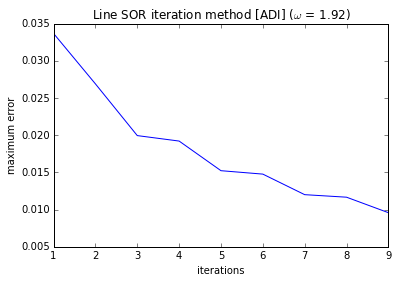

In [94]:
u_asor, it_asor, conv_asor, t_asor = line_sor(u0,f,h,0.01,1000,1.92,'adi')

## Red-Black Gauss-Seidel Iteration Method
The red-black Gauss-Seidel iteration method involves the ordering of the grid points in a checkerboard manner. If $(i+j)$ is even, the point is 'coloured' red and if it is odd, it is 'coloured' black, or vice versa. This is shown in the figure below:
<img src="red_black_SOR.png"alt="Drawing" style="width: 200px;"/>

The idea behind this method is that the black grids depend only on the red grids, and vice versa. So, we can update the red points and black points using each other in an alternating manner.

In [114]:
# Red-Black Gauss-Seidel Iteration Method
def rb_gauss_seidel(u,f,h,max_err,max_it):
    t = time.time()
    
    u_n = u.copy()
    conv = []
    it = 0

    # Step 1: create *integer* array the same size as u 
    x = np.zeros_like(u,dtype=np.int)
    
    # Step 2: populate all non-boundary cells with running numbers from 1 to (n-2)^2
    x[1:-1,1:-1] = np.arange(1,(n-2)**2+1).reshape(n-2,n-2)
    
    # Step 3: get indices of even (red) and odd (black) points
    ir, jr = np.where((x>0) & (x%2 == 0)) # indices of red pts = indices of even numbers
    ib, jb = np.where((x>0) & (x%2 == 1)) # indices of black pts = indices of odd numbers
    
    while True:
        it = it+1

        # Red point update
        u_n[ir,jr] = 0.25*(u_n[ir+1,jr] + u_n[ir-1,jr] + u_n[ir,jr+1] + u_n[ir,jr-1] - f[ir,jr]*h*h)
        
        # Black point update
        u_n[ib,jb] = 0.25*(u_n[ib+1,jb] + u_n[ib-1,jb] + u_n[ib,jb+1] + u_n[ib,jb-1] - f[ib,jb]*h*h)
                
        err = error(u_n)
        conv = np.concatenate((conv,[err]))

        if err < max_err:
            break

        if it > max_it:
            break 
    
    t = time.time() - t
    
    print 'Computation time = ' + ('%.5f' %t) + 's'
    print 'Iterations =', it
    print 'Maximum error = ' + ('%.4f' %err)
    plt2d(conv,it,'Red-Black Gauss Seidel iteration method (single)')
    
    return u_n, it, conv, t

Computation time = 0.48500s
Iterations = 333
Maximum error = 0.0100


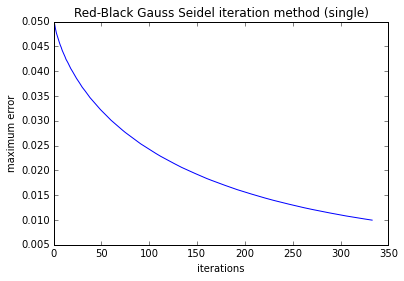

In [96]:
u_rbgs, it_rbgs, conv_rbgs, t_rbgs = rb_gauss_seidel(u0,f,h,0.01,1000)

## Red-Black SOR Iteration Method
The red-black SOR iteration method applies the checkerboard style ordering of grid points to the SOR method.

In [113]:
# Red-Black SOR Iteration Method
def rb_sor(u,f,h,max_err,max_it,w):
    t = time.time()
    
    u_n = u.copy()
    conv = []
    it = 0

    # Step 1: create *integer* array the same size as u 
    x = np.zeros_like(u,dtype=np.int)
    
    # Step 2: populate all non-boundary cells with running numbers from 1 to (n-2)^2
    x[1:-1,1:-1] = np.arange(1,(n-2)**2+1).reshape(n-2,n-2)
    
    # Step 3: get indices of even (red) and odd (black) points
    ir, jr = np.where((x>0) & (x%2 == 0)) # indices of red pts = indices of even numbers
    ib, jb = np.where((x>0) & (x%2 == 1)) # indices of black pts = indices of odd numbers
    
    while True:
        it = it+1
        
        # Red point update
        u_n[ir,jr] = (1-w)*u_n[ir,jr] + 0.25*w*(u_n[ir+1,jr] + u_n[ir-1,jr] + u_n[ir,jr+1] \
                                                  + u_n[ir,jr-1] - f[ir,jr]*h*h)
        
        # Black point update
        u_n[ib,jb] = (1-w)*u_n[ib,jb] + 0.25*w*(u_n[ib+1,jb] + u_n[ib-1,jb] + u_n[ib,jb+1] \
                                                    + u_n[ib,jb-1] - f[ib,jb]*h*h)
                
        err = error(u_n)
        conv = np.concatenate((conv,[err]))

        if err < max_err:
            break

        if it > max_it:
            break 
    
    t = time.time() - t
    
    print 'Computation time = ' + ('%.5f' %t) + 's'
    print 'Iterations =', it
    print 'Maximum error = ' + ('%.4f' %err)
    plt2d(conv,it,'Red-Black SOR iteration method')
    
    return u_n, it, conv, t

Computation time = 0.04300s
Iterations = 25
Maximum error = 0.0100


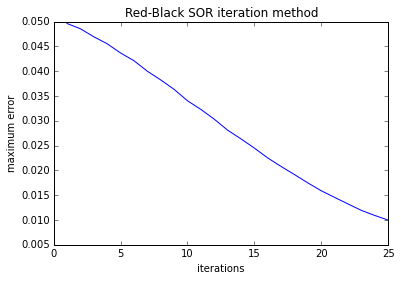

In [98]:
u_rbsor, it_rbsor, conv_rbsor, t_rbsor = rb_sor(u0,f,h,0.01,1000,1.87)

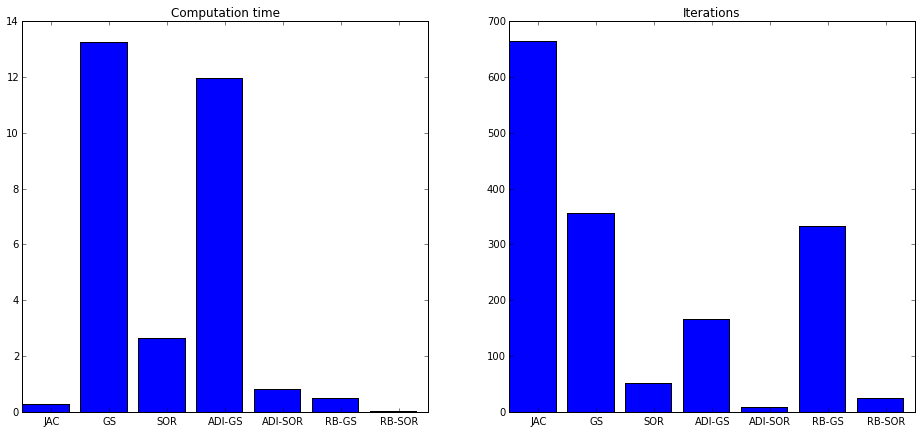

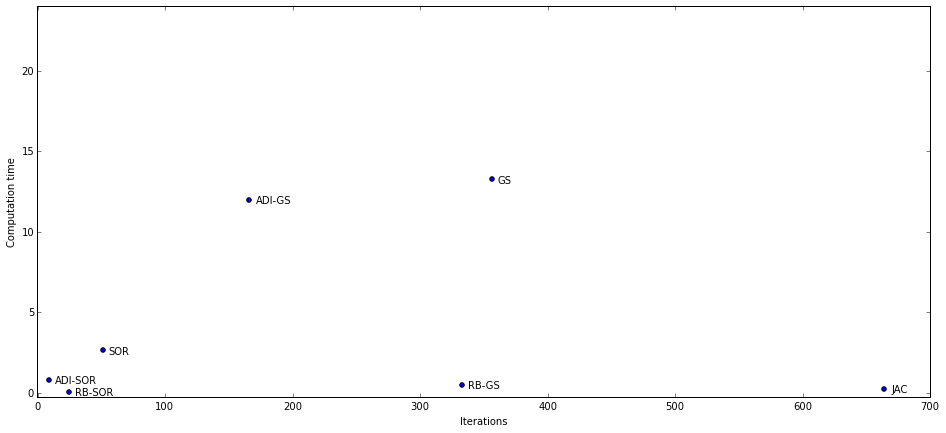

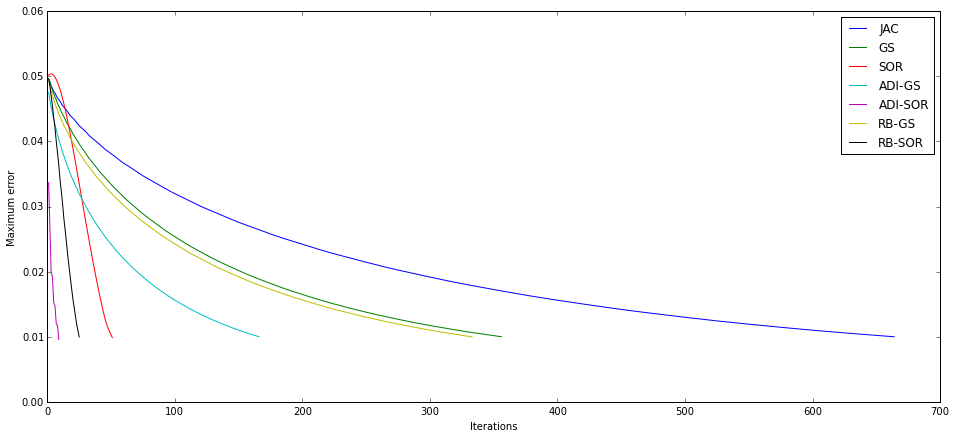

In [112]:
#Results
IT = np.array([it_j,it_gs,it_sor,it_lgs,it_adi,it_lsor,it_asor,it_rbgs,it_rbsor])
T = np.array([t_j,t_gs,t_sor,t_lgs,t_adi,t_lsor,t_asor,t_rbgs,t_rbsor])
CONV = np.array([conv_j,conv_gs,conv_sor,conv_lgs,conv_adi,conv_lsor,conv_asor,conv_rbgs,conv_rbsor])
label = np.array(['JAC','GS','SOR','Line GS','ADI-GS','Line SOR','ADI-SOR','RB-GS','RB-SOR'])
s = np.array([      0,   1,   2,              4,                  6,        7,      8]) #select data to plot
p = np.size(s) #no. of plots

fig = plt.figure(figsize=(16,7))

# Bar chart of computation time
fig.add_subplot(121)
plt.bar(np.arange(p),T[s])
plt.xticks(np.arange(0.5,7.5,1),label[s])
plt.title('Computation time')

# Bar chart of iterations
fig.add_subplot(122)
plt.bar(np.arange(p),IT[s])
plt.xticks(np.arange(0.5,7.5,1),label[s])
plt.title('Iterations')

# Scatter plot of computation time vs. iteration
fig = plt.figure(figsize=(16,7))
plt.scatter(IT[s],T[s])
plt.xlim([-0.1,700]), plt.xlabel('Iterations')
plt.ylim([-0.25,24]), plt.ylabel('Computation time')
for i in s:
    plt.annotate(label[i], (IT[i]+5,T[i]-0.2))
    
# Plot of maximum error vs. iteration
fig = plt.figure(figsize=(16,7))
for i in s:
    plt.plot(np.arange(1,IT[i]+1),CONV[i])
plt.legend(label[s])
plt.xlabel('Iterations')
plt.ylabel('Maximum error')

plt.show()

### Conclusion
- It can be seen that the **ADI-SOR** and **RB-SOR** are the best algorithms in this example in terms of **least iterations** and **least computation time**, respectively. 

    - Parallellizing the SOR method using red-black grid point ordering has allowed it to surpass the Jacobi method in terms of computation time. 

- Red-black ordering has also brought about a significant reduction in the computation time for the Gauss-Seidel method as well (compare 'GS' vs. 'RB-GS'). 

- The SOR methods' efficiency depends greatly on the choice of the relaxation parameter, $\omega$.

- Both the line methods (line Gauss-Seidel & line SOR) performed poorly; they did not even converge to an error of $0.01$ within the $1000$ iterations allowed.

- However, the ADI methods (ADI Gauss-Seidel & ADI SOR) performed much better than their line counterparts.
    - ADI Gauss-Seidel performed *worse* than the conventional Gauss-Seidel method. 
    - ADI SOR performed *better* than the conventional SOR in terms of computation time and number of iterations (9 iterations)!

---
#### References
1. Canale, R., & Chapra, S. (2014). Numerical Methods for Engineers: McGraw-Hill Education.
2. Chung, T. J. (2010). Computational Fluid Dynamics: Cambridge University Press.
---

*(The cell below contains code for additional functions required above.)*

In [115]:
# Compute maximum absolute error between computed & analytical solution
def error(u):
    error = u-u_a
    err = (abs(error)).max()
        
    return err
    
# Plot 2D graph of maxmimum error vs. iteration
def plt2d(err,it,title):
    fig.add_subplot(111)
    plt.plot(np.arange(1,it+1),err)
    plt.title(title), plt.xlabel('iterations'), plt.ylabel('maximum error')
    
# Create tridiagonal elements
def CM(N):
    # Build coefficient 'matrix', [A]
    d = -4*np.ones(N) # main diagonal
    l = np.ones(N-1) # lower diagonal
    up = np.ones(N-1) # upper diagonal
    
    d_n = d.copy() # main diagonal - after elimination of lower diagonal
    for i in range(1,N):
        d_n[i] = d[i] - up[i-1]*l[i-1]/d_n[i-1]
        
    return l, d_n, up

# Create tridiagonal elements for relaxation methods
def CMR(N,w):
    # Build coefficient 'matrix', [A]
    d = -4*np.ones(N) # main diagonal
    l = np.ones(N-1)*w # lower diagonal
    up = np.ones(N-1)*w # upper diagonal
    
    d_n = d.copy() # main diagonal - after elimination of lower diagonal
    # Forward elimination of lower-diagonal elements
    for i in range(1,N):
        d_n[i] = d[i] - up[i-1]*l[i-1]/d_n[i-1]
                
    return l, d_n, up

# THOMAS ALGORITHM - Tridiagonal matrix system solver, solve [A][X]=[B]
def TDMA(B,l,d_n,up):
    N = np.size(B)   
    
    # Forward elimination of lower-diagonal elements
    for i in range(1,N):
        B[i] = B[i] - B[i-1]*l[i-1]/d_n[i-1]
    
    X = np.zeros_like(B)
    # Backward substitution
    X[-1] = B[-1]/d_n[-1]
    d_n[:-1] - d_n[1:]*up
    for i in range (N-2,-1,-1):
        X[i] = (B[i] - up[i]*X[i+1])/d_n[i]
        
    return X